# Random Forest Python Tutorial

# Digits dataset from sklearn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

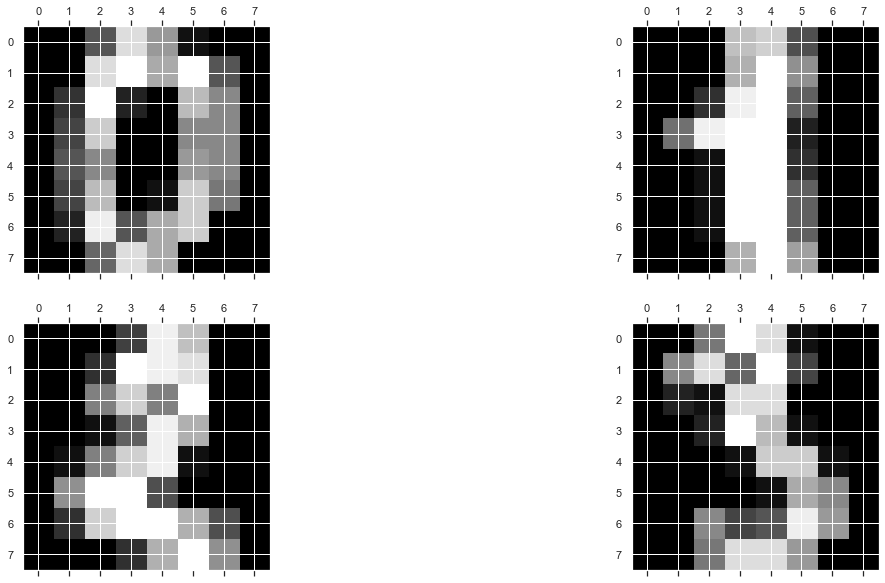

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))

ax[0,0].matshow(digits.images[0])
ax[0,1].matshow(digits.images[1])
ax[1,0].matshow(digits.images[2])
ax[1,1].matshow(digits.images[3])

In [13]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


# Train and the model and prediction

In [14]:
X = df.drop('target', axis='columns')
y = df.target

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [16]:
len(X_train)

1437

In [17]:
len(X_test)

360

# Creating Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [19]:
model.score(X_test, y_test)

0.9638888888888889

# Confusion Matrix

In [20]:
y_predicted = model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 34,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  1,  0,  1,  1,  0,  0,  0,  1, 26]], dtype=int64)

Text(156.5, 0.5, 'Truth')

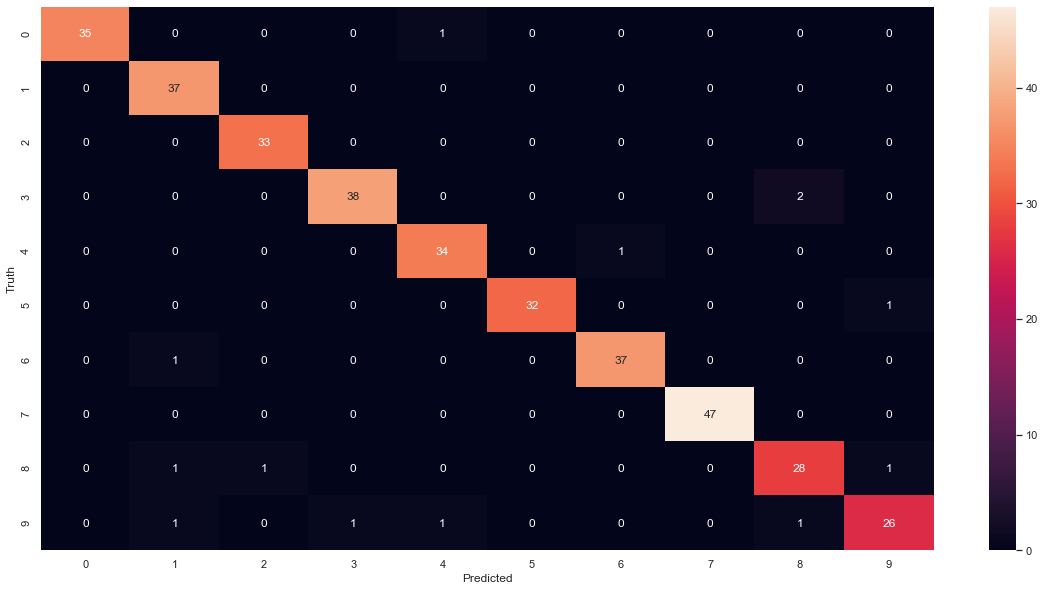

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')